In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
selected_columns = [
    'bant_submit', 'customer_country', 'business_unit', 'com_reg_ver_win_rate',
    'customer_idx', 'customer_type', 'enterprise', 'historical_existing_cnt',
    'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'customer_job',
    'lead_desc_length', 'inquiry_type', 'product_category', 'product_subcategory',
    'product_modelname', 'customer_country.1', 'customer_position',
    'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
    'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area', 'business_subarea',
    'lead_owner'
]

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'

df = pd.read_csv(train_file_path)

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [58]:
df_business_area = df.dropna(subset=['business_area'])

converted_counts_business_area = df_business_area.groupby('business_area')['is_converted'].sum().reset_index()
total_counts_business_area = df_business_area.groupby('business_area')['is_converted'].count().reset_index()

ratio_df_business_area = pd.merge(converted_counts_business_area, total_counts_business_area, on='business_area', how='left')
ratio_df_business_area['conversion_ratio'] = ratio_df_business_area['is_converted_x'] / ratio_df_business_area['is_converted_y']

for index, row in ratio_df_business_area.iterrows():
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    print(f"{row['business_area']} 별 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")

corporate / office 별 is_converted 비율: 6.54%, 전체 갯수: 4097, is_converted된 갯수: 268
education 별 is_converted 비율: 6.31%, 전체 갯수: 1727, is_converted된 갯수: 109
factory 별 is_converted 비율: 8.60%, 전체 갯수: 1035, is_converted된 갯수: 89
government department 별 is_converted 비율: 6.00%, 전체 갯수: 650, is_converted된 갯수: 39
hospital & health care 별 is_converted 비율: 31.11%, 전체 갯수: 1199, is_converted된 갯수: 373
hotel & accommodation 별 is_converted 비율: 5.96%, 전체 갯수: 2013, is_converted된 갯수: 120
power plant / renewable energy 별 is_converted 비율: 17.70%, 전체 갯수: 113, is_converted된 갯수: 20
public facility 별 is_converted 비율: 6.55%, 전체 갯수: 519, is_converted된 갯수: 34
residential (home) 별 is_converted 비율: 2.48%, 전체 갯수: 1818, is_converted된 갯수: 45
retail 별 is_converted 비율: 5.25%, 전체 갯수: 3011, is_converted된 갯수: 158
special purpose 별 is_converted 비율: 5.24%, 전체 갯수: 1929, is_converted된 갯수: 101
transportation 별 is_converted 비율: 5.88%, 전체 갯수: 306, is_converted된 갯수: 18


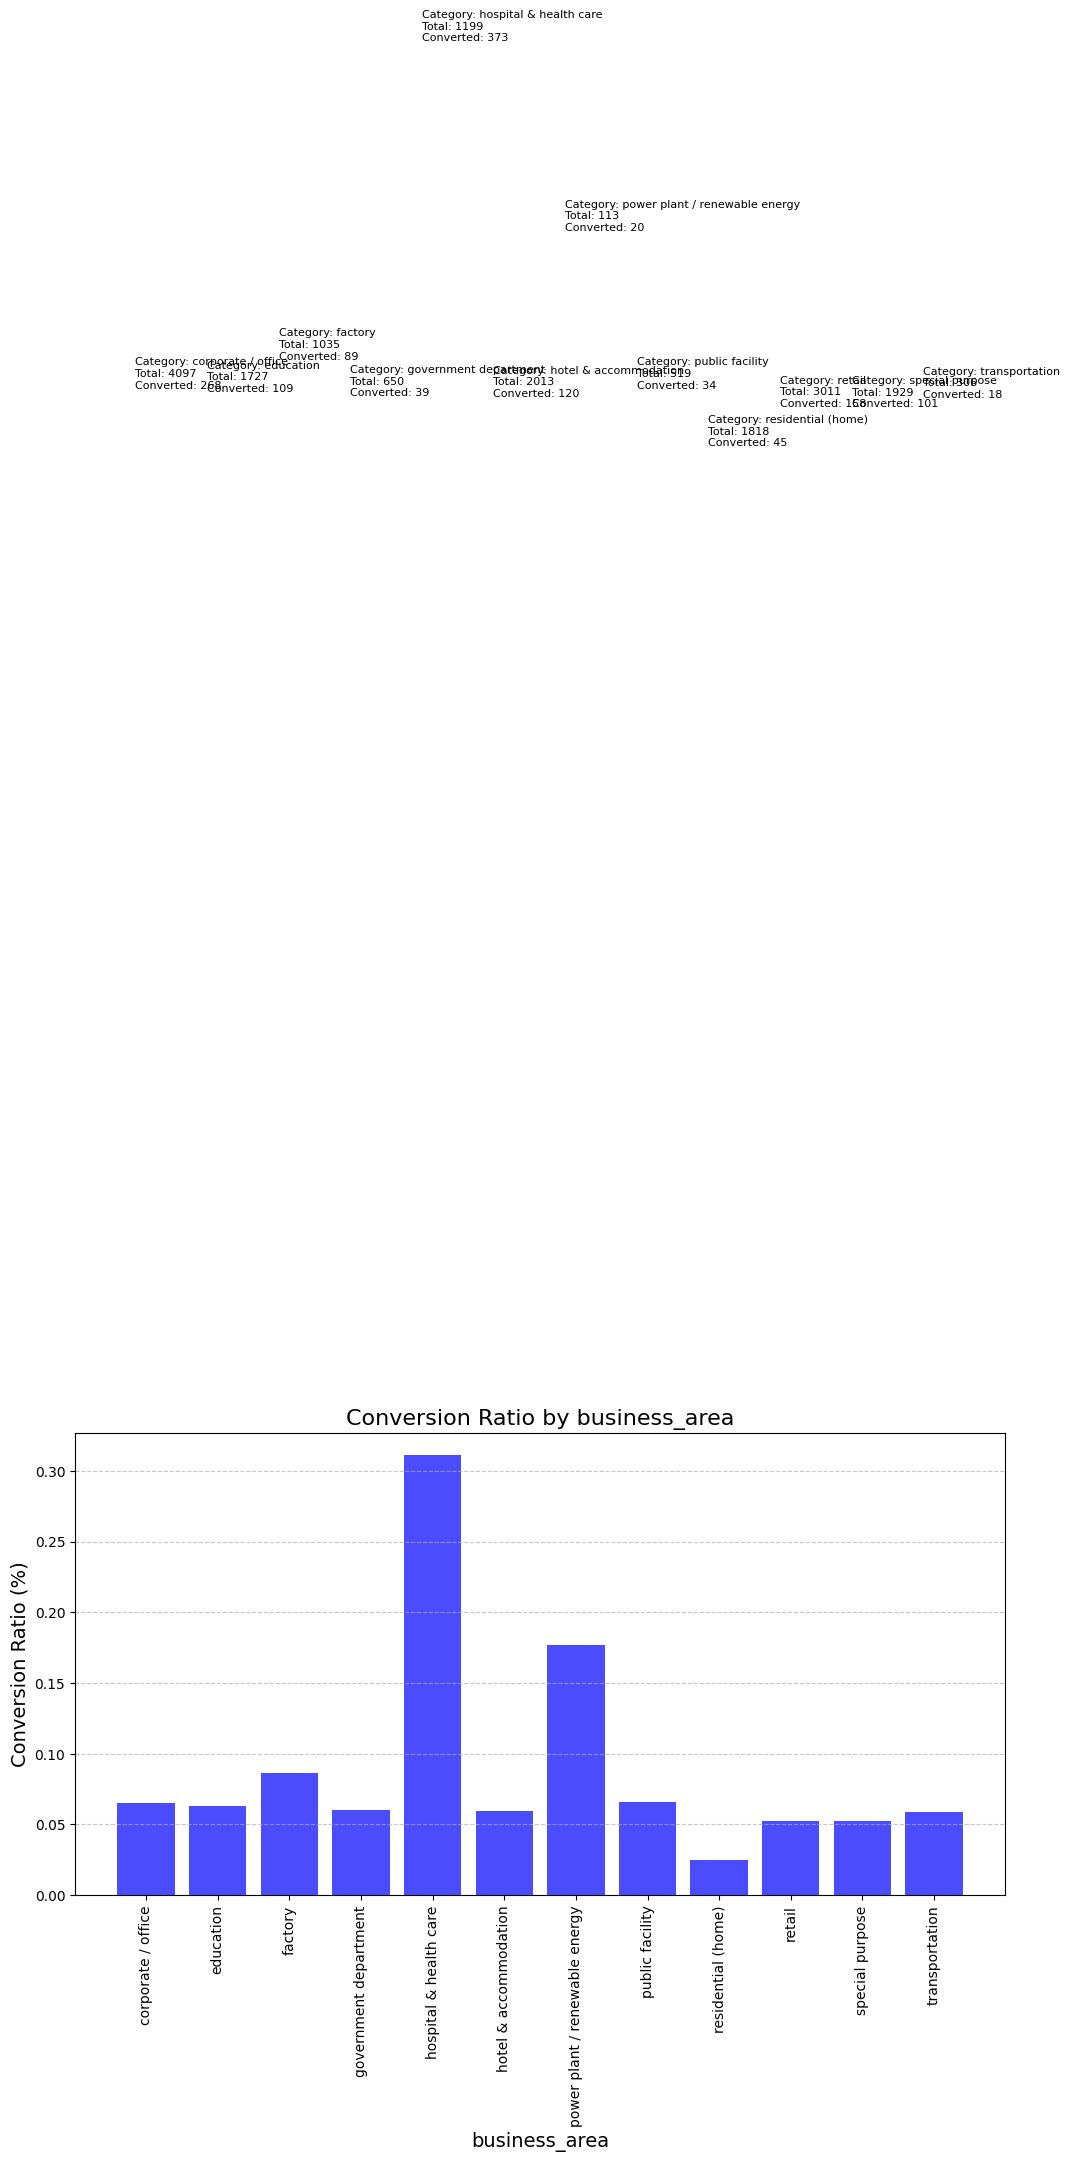

In [59]:
plt.figure(figsize=(12, 6))
bars = plt.bar(ratio_df_business_area['business_area'], ratio_df_business_area['conversion_ratio'], color='blue', alpha=0.7)

for bar, total, converted, category in zip(bars, ratio_df_business_area['is_converted_y'], ratio_df_business_area['is_converted_x'], ratio_df_business_area['business_area']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1,
             f'Category: {category}\nTotal: {total}\nConverted: {converted}', fontsize=8, color='black')

plt.title('Conversion Ratio by business_area', fontsize=16)
plt.xlabel('business_area', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)
plt.xticks(rotation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
